# **Algoritmos: Coloreado de Grafos**

### **Marcos Damián Pool Canul** & **Oscar Manuel Ruiz Reyes**

#### Librerias principales

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint, choice, random
from tabulate import tabulate

#### Solicitar el numero de vertices

In [2]:
numero_vertices = int(input("Ingrese el número de vértices: "))
print("Numero de vertices: ", numero_vertices)

Numero de vertices:  10


#### Funciones principales

In [3]:
def grafo_conectado(numero_vertices):
    """
    Crea un grafo conectado con numero_vertices vértices.
    """
    G = nx.Graph()
    G.add_nodes_from(range(numero_vertices))

    # Asegurarnos de que el grafo esté conectado
    for i in range(numero_vertices - 1):
        G.add_edge(i, i + 1)

    # Agregar más aristas aleatoriamente para hacer el gráfico más complejo
    additional_edges = numero_vertices // 2
    for _ in range(additional_edges):
        v1, v2 = randint(0, numero_vertices -
                         1), randint(0, numero_vertices - 1)
        while G.has_edge(v1, v2) or v1 == v2:
            v1, v2 = randint(0, numero_vertices -
                             1), randint(0, numero_vertices - 1)
        G.add_edge(v1, v2)

    return G

In [4]:
def colores_iniciales(G, colores=['red', 'green', 'blue', 'yellow']):
    """
    Asigna colores iniciales a los vértices del grafo.
    """
    for nodo in G.nodes():
        G.nodes[nodo]['color'] = choice(colores)

    return G

In [5]:
def dibujar_grafo(G, titulo):
    """
    Dibuja el grafo con vértices coloreados.
    """
    plt.figure(figsize=(8, 6))
    mapa_colores = [G.nodes[nodo]['color'] for nodo in G.nodes()]
    nx.draw(G, with_labels=True, node_color=mapa_colores,
            node_size=500, font_size=10)
    plt.title(titulo)
    plt.show()

In [6]:
def crear_tabla_grados(G, orden_inverso=False):
    """
    Crea una tabla para mostrar cada vértice y su grado.
    """
    # Ordenar los vértices según el grado (el orden inverso depende del parámetro)
    vertices_ordenados = sorted(
        G.nodes(), key=lambda x: G.degree(x), reverse=orden_inverso)

    # Crear una lista de tuplas (vértice, grado)
    lista_grados_vertices = [(f"Vértice {vertice}", f"Grado {G.degree(vertice)}") for vertice in vertices_ordenados]

    # Crear una tabla usando tabulate
    tabla = tabulate(lista_grados_vertices, headers=[
                     'Vértice', 'Grado'], tablefmt='grid')
    return tabla

## **Algoritmo de Coloración de Welsh y Powell**

In [7]:
def algoritmo_welsh_powell(G, colores=['red', 'green', 'blue', 'yellow']):
    """
    Aplica el algoritmo Welsh-Powell para colorear el grafo.
    """
    # Ordena los vértices según el grado descendente.
    vertices_ordenados = sorted(
        G.nodes(), key=lambda x: G.degree(x), reverse=True)

    for nodo in vertices_ordenados:
        # Encuentra el primer color que no utilizan los vértices adyacentes.
        colores_adyacentes = {G.nodes[vecino]['color']
                              for vecino in G.neighbors(nodo)}
        for color in colores:
            if color not in colores_adyacentes:
                G.nodes[nodo]['color'] = color
                break

    return G

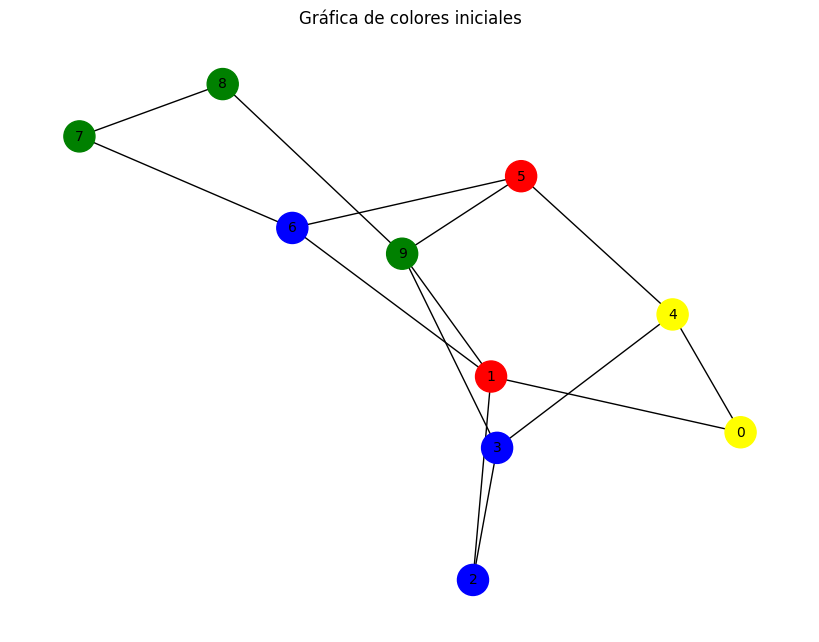

In [8]:
G = grafo_conectado(numero_vertices)
G = colores_iniciales(G)
dibujar_grafo(G, "Gráfica de colores iniciales")

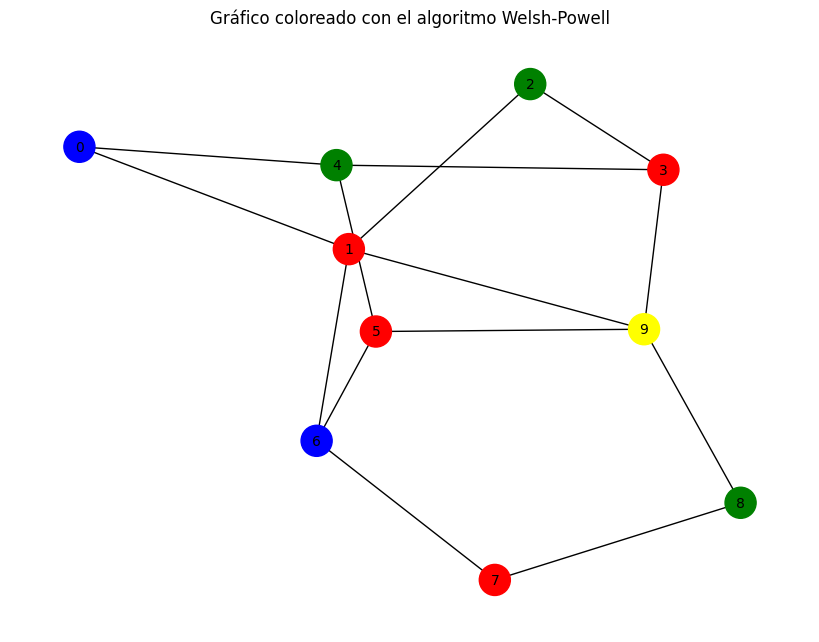

[(1, 4),
 (9, 4),
 (3, 3),
 (4, 3),
 (5, 3),
 (6, 3),
 (0, 2),
 (2, 2),
 (7, 2),
 (8, 2)]

In [9]:
# Aplicar el algoritmo de Welsh-Powell
G_coloreado_welsh_powell = algoritmo_welsh_powell(G.copy())
dibujar_grafo(G_coloreado_welsh_powell,
              "Gráfico coloreado con el algoritmo Welsh-Powell")

# Imprimir el grado de cada vértice.
grados_vertices = [(nodo, G.degree(nodo)) for nodo in sorted(
    G.nodes(), key=lambda x: G.degree(x), reverse=True)]
grados_vertices

In [10]:
# Tabla 1: Grados de los vértices de la Coloración Welsh y Powell
tabla_grados = crear_tabla_grados(G, orden_inverso=True)
print(tabla_grados)

+-----------+---------+
| Vértice   | Grado   |
+===========+=========+
| Vértice 1 | Grado 4 |
+-----------+---------+
| Vértice 9 | Grado 4 |
+-----------+---------+
| Vértice 3 | Grado 3 |
+-----------+---------+
| Vértice 4 | Grado 3 |
+-----------+---------+
| Vértice 5 | Grado 3 |
+-----------+---------+
| Vértice 6 | Grado 3 |
+-----------+---------+
| Vértice 0 | Grado 2 |
+-----------+---------+
| Vértice 2 | Grado 2 |
+-----------+---------+
| Vértice 7 | Grado 2 |
+-----------+---------+
| Vértice 8 | Grado 2 |
+-----------+---------+


## **Algoritmo de Coloración de Matula, Marble, Isaacson**

In [11]:
def algoritmo_matula_marble_isaacson(G, colores=['red', 'green', 'blue', 'yellow']):
    """
    Aplica el algoritmo Matula-Marble-Isaacson para colorear el grafo.
    Este algoritmo ordena los vértices en orden ascendente de grado y luego los colorea.
    """
    # Ordena los vértices según el grado ascendente.
    vertices_ordenados = sorted(G.nodes(), key=lambda x: G.degree(x))

    for nodo in vertices_ordenados:
        # Encuentra el primer color que no utilizan los vértices adyacentes.
        colores_adyacentes = {G.nodes[vecino]['color']
                              for vecino in G.neighbors(nodo)}
        for color in colores:
            if color not in colores_adyacentes:
                G.nodes[nodo]['color'] = color
                break

    return G

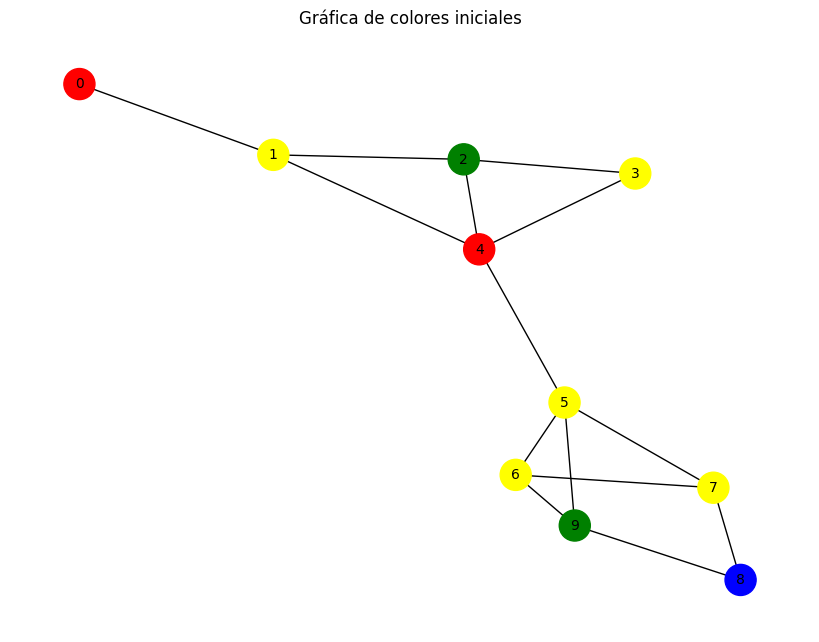

In [12]:
H = grafo_conectado(numero_vertices)
H = colores_iniciales(H)
dibujar_grafo(H, "Gráfica de colores iniciales")

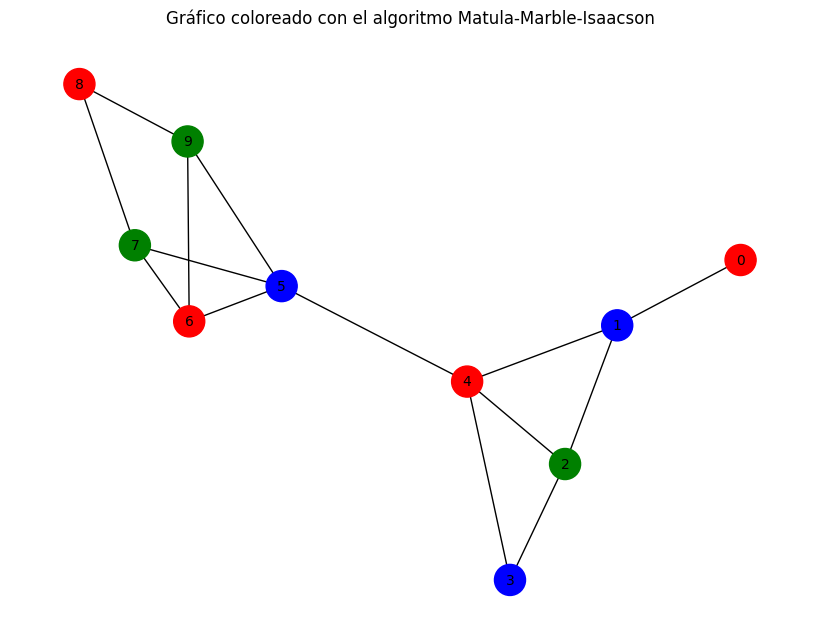

[(4, 4),
 (5, 4),
 (1, 3),
 (2, 3),
 (6, 3),
 (7, 3),
 (9, 3),
 (3, 2),
 (8, 2),
 (0, 1)]

In [13]:
# Aplicar el algoritmo Matula-Marble-Isaacson
H_coloreado_matula_marble = algoritmo_matula_marble_isaacson(
    H.copy())
dibujar_grafo(H_coloreado_matula_marble,
              "Gráfico coloreado con el algoritmo Matula-Marble-Isaacson")

# Imprimir el grado de cada vértice.
grados_vertices = [(nodo, H.degree(nodo)) for nodo in sorted(
    G.nodes(), key=lambda x: H.degree(x), reverse=True)]
grados_vertices

In [14]:
# Tabla 2: Grados de los vértices de coloración Matula, Marble, Isaacson
tabla_matula_marble = crear_tabla_grados(
    H, orden_inverso=False)
print(tabla_matula_marble)

+-----------+---------+
| Vértice   | Grado   |
+===========+=========+
| Vértice 0 | Grado 1 |
+-----------+---------+
| Vértice 3 | Grado 2 |
+-----------+---------+
| Vértice 8 | Grado 2 |
+-----------+---------+
| Vértice 1 | Grado 3 |
+-----------+---------+
| Vértice 2 | Grado 3 |
+-----------+---------+
| Vértice 6 | Grado 3 |
+-----------+---------+
| Vértice 7 | Grado 3 |
+-----------+---------+
| Vértice 9 | Grado 3 |
+-----------+---------+
| Vértice 4 | Grado 4 |
+-----------+---------+
| Vértice 5 | Grado 4 |
+-----------+---------+


## **Algoritmo de Coloración de Brelaz**

In [15]:
def algoritmo_Brelaz(G):
    """
    Aplica el algoritmo de Brelaz para colorear el grafo.
    """
    # Inicializar el color de todos los nodos a None
    color = {node: None for node in G.nodes()}

    # Mientras haya nodos sin color
    while None in color.values():
        # Ordenar los nodos por grado de saturación y luego por grado
        nodes = sorted(G.nodes(), key=lambda x: (sum(
            color[neighbor] is not None for neighbor in G.neighbors(x)), G.degree(x)), reverse=True)
        # Seleccionar el primer nodo que no tiene color
        for node in nodes:
            if color[node] is None:
                break
        # Encuentra el primer color que no utilizan los vértices adyacentes
        for c in range(len(G.nodes())):
            if all(color[neighbor] != c for neighbor in G.neighbors(node)):
                color[node] = c
                break

    # Después de que todos los nodos han sido coloreados, calcular e imprimir el grado de saturación de cada nodo
    for node in G.nodes():
        saturation_degree = len(set(color[neighbor] for neighbor in G.neighbors(
            node) if color[neighbor] is not None))
        print(f"El grado de saturación del nodo {node} es {saturation_degree}")

    return color

In [16]:
def coloreo_brelaz(G, colores=['red', 'green', 'blue', 'yellow']):
    """
    Aplica el algoritmo de Brelaz para colorear el grafo.
    """
    # Llamar a la función brelaz_algorithm
    color = algoritmo_Brelaz(G)

    # Asignar los colores al grafo
    for vertex in color:
        G.nodes[vertex]['color'] = colores[color[vertex] % len(colores)]

    return G

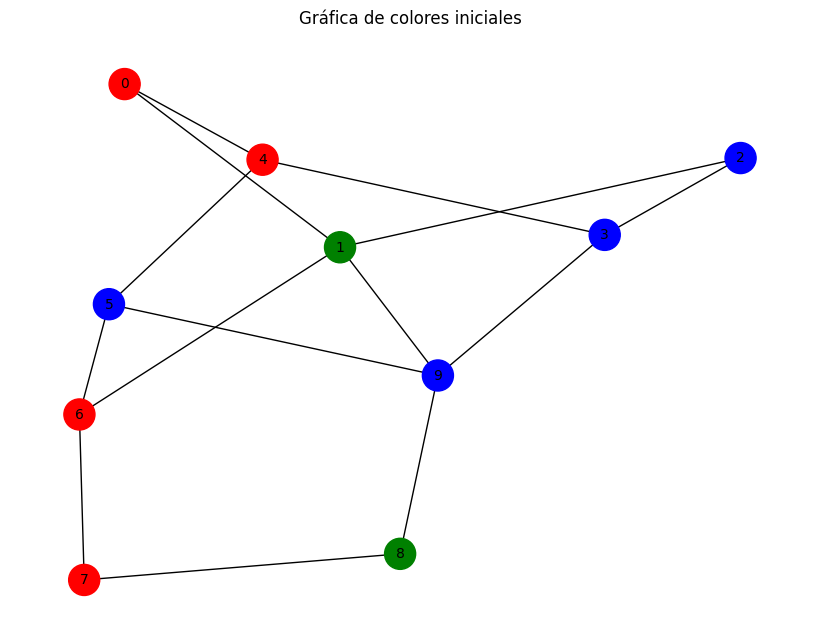

In [17]:
G_coloreado_brelaz = grafo_conectado(numero_vertices)
G_coloreado_brelaz = colores_iniciales(G)
dibujar_grafo(G, "Gráfica de colores iniciales")

In [18]:
G_coloreado_brelaz = coloreo_brelaz(G.copy())

El grado de saturación del nodo 0 es 2
El grado de saturación del nodo 1 es 2
El grado de saturación del nodo 2 es 1
El grado de saturación del nodo 3 es 1
El grado de saturación del nodo 4 es 2
El grado de saturación del nodo 5 es 1
El grado de saturación del nodo 6 es 1
El grado de saturación del nodo 7 es 2
El grado de saturación del nodo 8 es 2
El grado de saturación del nodo 9 es 2


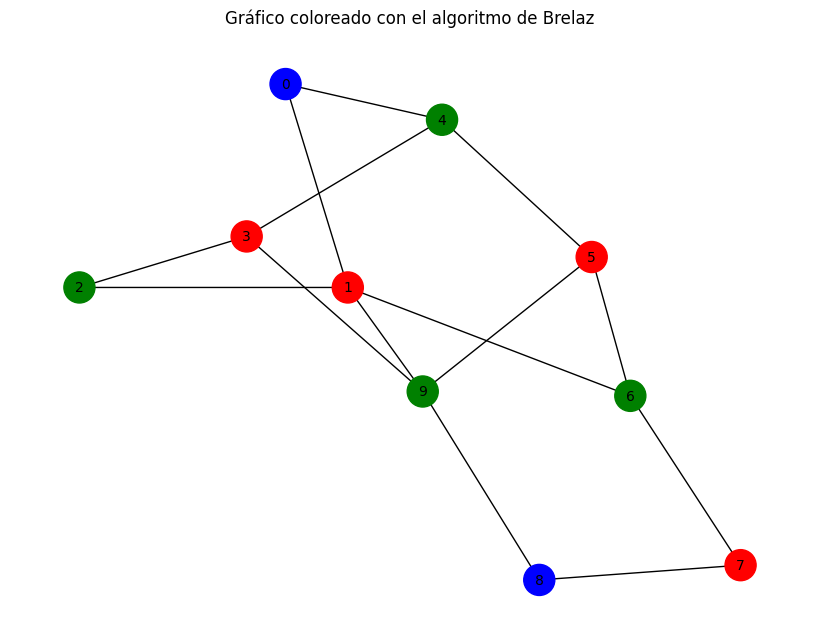

In [19]:
# Aplicar el algoritmo de Brelaz
dibujar_grafo(G_coloreado_brelaz,
              "Gráfico coloreado con el algoritmo de Brelaz")